In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
print(torch.__version__)
torch.cuda.is_available()

1.9.0+cu111


False

# Tensors

- **Rank** : No of dimensions of tensor
- Two tensors must be of same type and same device

In [ ]:
t = [[1,2,3],[1,2,3],[1,2,3]]
t = torch.tensor(t)

print(t.shape)
print(t.dtype)
print(t.device)
print(t.layout)

print(t.numel())

torch.Size([3, 3])
torch.int64
cpu
torch.strided
9


## Create Tensors

In [ ]:
arr = np.array([1,2,3])

# BOTH CREATE COPY
print(torch.Tensor(arr)) # Constructor default_dtype=float32
print(torch.tensor(arr)) # Factory Function (returns object)

# STORE REFERENCE TO NUMPY ARRAY
print(torch.as_tensor(arr))
print(torch.from_numpy(arr))

print(torch.tensor(arr,dtype=torch.float32))

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([1, 2, 3])
tensor([1, 2, 3])
tensor([1., 2., 3.])


In [ ]:
print(torch.eye(3))
print(torch.ones(2,2))
print(torch.zeros(2,2))
print(torch.rand(5,5))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[0.4249, 0.8571, 0.0067, 0.5597, 0.8240],
        [0.7246, 0.6808, 0.6740, 0.8731, 0.3896],
        [0.8986, 0.1962, 0.5268, 0.9245, 0.6386],
        [0.9305, 0.1181, 0.1682, 0.6322, 0.5170],
        [0.7196, 0.9234, 0.4117, 0.0364, 0.7054]])


## Reshaping
- squeeze : remove 1-dim tensors
- unsqueeze : add 1-dim tensors

In [ ]:
def flatten(t):
  print(t.shape)
  t = t.reshape(1,-1)
  print(t.shape)
  t = t.squeeze()
  print(t.shape)
  return t

arr = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]])
flatten(torch.tensor(arr))

torch.Size([4, 4])
torch.Size([1, 16])
torch.Size([16])


tensor([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

In [ ]:
t1 = torch.tensor([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])

print(t1.shape)
print(t1.unsqueeze(dim=0).shape)
print(t1.unsqueeze(dim=1).shape)
print(t1.unsqueeze(dim=2).shape)

torch.Size([4, 4])
torch.Size([1, 4, 4])
torch.Size([4, 1, 4])
torch.Size([4, 4, 1])


## Concat vs Stack

In [ ]:
a = torch.zeros(2,2)
b = torch.ones(2,2)


print("CAT")
print(torch.cat((a,b),dim=0).shape) # Row add
print(torch.cat((a,b),dim=1).shape) # Col add

print("\nSTACK")
print(torch.stack((a,b), dim=0).shape)
print(torch.stack((a,b), dim=1).shape)

CAT
torch.Size([4, 2])
torch.Size([2, 4])

STACK
torch.Size([2, 2, 2])
torch.Size([2, 2, 2])


## Reductions

- Results of reductions are Tensor Objects
- **Scalar** : res.item()
- Vector : res.to_list() or res.numpy()

In [ ]:
arr = torch.tensor([[1,1,1,1],[2,2,2,2],[3,3,3,3]],dtype=torch.float32)

print(arr.mean())
print(arr.mean(dim=0)) # COLUMN
print(arr.mean(dim=1)) # ROW

print()
print(arr.sum())
print(arr.sum(dim=0)) # COLUMN
print(arr.sum(dim=1)) # ROW


tensor(2.)
tensor([2., 2., 2., 2.])
tensor([1., 2., 3.])

tensor(24.)
tensor([6., 6., 6., 6.])
tensor([ 4.,  8., 12.])


**argmax**
arr.argmax() -> returns index after flattening

In [ ]:
arr = torch.tensor([[1,1,11,1],[2,12,2,2],[3,3,3,13]],dtype=torch.float32)

print(arr.argmax())
print(arr.argmax(dim=0)) # COLUMN
print(arr.argmax(dim=1)) # ROW

tensor(11)
tensor([2, 1, 0, 2])
tensor([2, 1, 3])


## CNN example

General CNN train tuple : [batch, color, h, w]

In [ ]:
t1 = torch.tensor([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
t2 = torch.tensor([[2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2]])
t3 = torch.tensor([[3,3,3,3],[3,3,3,3],[3,3,3,3],[3,3,3,3]])

# stack images into batch
inp = torch.stack((t1,t2,t3))
print(inp.shape)

# Asume grayscale -> (bat, 1, h,w)
inp.unsqueeze(dim=1).shape

torch.Size([3, 4, 4])


torch.Size([3, 1, 4, 4])

In [ ]:
# Flatten only images i.e (3,1,4,4) -> (3,16)
print(torch.flatten(inp).shape)
print(torch.flatten(inp,start_dim=1).shape)

#OR 
print(inp.reshape(inp.shape[0],-1).shape)

torch.Size([48])
torch.Size([3, 16])
torch.Size([3, 16])


## Element wise addition

In [ ]:
a = torch.tensor([[1,2],[3,4]])
b = torch.tensor([[5,6],[7,8]])

print(a+b)

**Broadcasting** : lower ranked tensor can be auto-scaled to higher ranked **ones**

In [ ]:
print(a+2)

# Internal working
print(a+torch.broadcast_to(torch.tensor(2),(2,2)))

print()
# Broadcast
A = torch.tensor([[1,2,],[3,4]])
B = torch.tensor([1,2])

print(A.shape)
print(B.shape)
print(A+B)
print((A+B).shape)

tensor([[3, 4],
        [5, 6]])
tensor([[3, 4],
        [5, 6]])

torch.Size([2, 2])
torch.Size([2])
tensor([[2, 4],
        [4, 6]])
torch.Size([2, 2])


# MNSIT Dataset

- **Dataset** : abstract class to represent a dataset -> Custom (you need to extend this and write all functions needed)
  - Needed fun : \__init__, \__getitem__, \__len__
- **DataLoader** : Wrapper for Dataset

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root = "./data/FashionMNIST",
    train = True, download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)
print(type(train_set))

trainLoader = torch.utils.data.DataLoader(train_set, batch_size=10)
print(type(trainLoader))

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw

<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'torch.utils.data.dataloader.DataLoader'>


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print(train_set.targets)
print(train_set.train_labels.bincount())

tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([1, 28, 28])
torch.Size([28, 28])


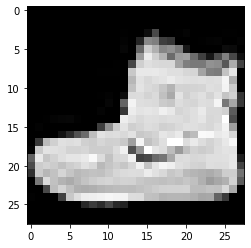

In [ ]:
img, label  = next(iter(train_set))
print(img.shape)
print(img.squeeze().shape)
plt.imshow(img.squeeze(),cmap='gray')

torch.Size([10, 1, 28, 28])
torch.Size([3, 62, 152])
torch.Size([62, 152, 3])


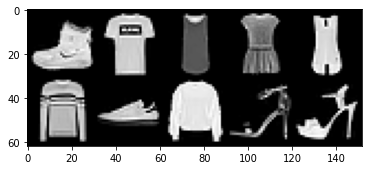

In [5]:
imgs, labels  = next(iter(trainLoader))
print(imgs.shape)

grid = torchvision.utils.make_grid(imgs, nrow=5)

print(grid.shape)
print(np.transpose(grid, (1,2,0)).shape)

plt.imshow(np.transpose(grid, (1,2,0)))

# Neural Networks

- Functions in **init** have learnable weights : conv,Linear
- Other functions which dont have learnable weights can be used (relu, maxpool)

In [8]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    # out_channels = n_filters
    # Conv2d -> Conv+Pool -> (28,28,1) -> conv2 -> (28-5+1)/2 
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6,kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12,kernel_size=5)
  
    # Linear = Dense
    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
  
  # return Output of the network
  def forward(self, t):
    t = t # INPUT LAYER

    t = self.conv1(t)  #CONV1
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2)

    t = self.conv2(t) #CONV2
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2)

    t = t.reshape(-1,12*4*4)
    t = self.fc1(t)
    t = F.relu(t)

    t = self.fc2(t)
    t = F.relu(t)

    t = self.out(t)
    # t = F.softmax(t, dim=1) 

    return t

In [9]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [14]:
# !pip install torchviz
from torchviz import make_dot
img_batch, labels = next(iter(trainLoader))
preds = network(img_batch)

make_dot(preds, params=dict(list(network.named_parameters()))).render("rnn_torchviz", format="png")


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


'rnn_torchviz.png'

## Layers in depth

**Linear Layer Working** : (weight_matrix x Input) = Flattened Output
<br>
**Conv2D working** : Conv+Pool -> (28,28,1) -> conv2 -> (28-5+1)/2 

In [ ]:
# learnable weights
# CNN -> [n_filters, input_channel, kernel_size]
print(network.conv1.weight.shape)
print(network.conv2.weight.shape)

# Linear -> [op_dim, inp_dim]
print(network.fc1.weight.shape)
print(network.fc2.weight.shape)
print(network.out.weight.shape)

# for param in networ.parameters()

In [ ]:
# Working of Linear : wt*inp
inp = torch.tensor([1,2,3,4],dtype=torch.float32)
w = torch.tensor([[1,2,3,4],[1,2,3,4],[1,2,3,4]],dtype=torch.float32)


print(inp.shape)
print(w.shape)

res = w.matmul(inp)
print(res.shape)
print(res)

# Linear Layer
fc = nn.Linear(in_features=4, out_features=3)
fc.weight = nn.Parameter(w)
fc(inp) # calles _call_ method of Linear

# Linear not exact as Matul due to Bias Ter

## Predicting (Not yet trained)

In [ ]:
# SINGLE IMAGE
img, label = next(iter(train_set))
print(img.shape)
print(img.unsqueeze(dim=0).shape)

pred = network(img.unsqueeze(0))
print("\nPred Shape :",pred.shape)
print(pred)
print(pred.argmax())

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])

Pred Shape : torch.Size([1, 10])
tensor([[-0.0510, -0.1188,  0.1280,  0.1166, -0.0295,  0.1150, -0.0290, -0.0749,
          0.0050, -0.1347]], grad_fn=<AddmmBackward>)
tensor(2)


In [ ]:
img_batch, labels = next(iter(trainLoader))
print(img_batch.shape)

preds = network(img_batch)
print(preds.shape)

print("\nPredictions :", preds.argmax(dim=1))
print("Actual Predictions :",labels)

def get_correct_n(preds, gt):
  return preds.argmax(dim=1).eq(gt).sum()

print(get_correct_n(preds,labels))

torch.Size([10, 1, 28, 28])
torch.Size([10, 10])

Predictions : tensor([1, 0, 1, 0, 0, 0, 1, 0, 1, 0])
Actual Predictions : tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])
tensor(2)


# Training

**Steps**
1. Get batch from dataset
2. Pass batch to model (forward prop)
3. Calculate Loss
4. Calculate gradient of Loss wrt weights
5. Update weights using gradients
6. Repeat 1-5 until all samples are covered (**1 Epoch**)

In [ ]:
# Get batch iterator
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
imgs, labels = next(iter(train_loader))
print(imgs.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [ ]:
# Calculate Loss
network = Network()
preds = network(imgs)
loss = F.cross_entropy(preds,labels) # automatically applies Softmax
print(loss.item())

# Calculate Gradients
print(network.conv1.weight.grad)
loss.backward()
print(network.conv1.weight.grad.shape)

# UPDATE WEIGHTS : Optimizer
optimizer = optim.Adam(network.parameters(), lr=0.01)
optimizer.step() # Update weights

2.306241035461426
None
torch.Size([6, 1, 5, 5])


In [ ]:
losses = []

epochs = 5
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
network = Network()
optimizer = optim.Adam(network.parameters(), lr=0.01) 

for i in range(epochs):
  total_loss = 0
  for images,labels in iter(train_loader):
    preds = network(images) # PASSS ONE BATCH
    loss = F.cross_entropy(preds, labels) # CALCULATE LOSS 

    optimizer.zero_grad() # Remove any precal gradients
    loss.backward() # CALCULATE GRADIENTS
    optimizer.step() # UPDATE WEIGHTS

    total_loss += loss.item()
  losses.append(total_loss)
  


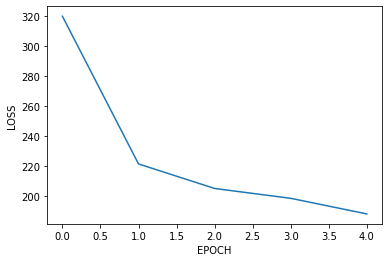

In [ ]:
plt.plot(losses)
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show

In [ ]:
preds = network(train_set.train_data.unsqueeze(dim=1).float())
print(preds.shape)
preds = preds.argmax(dim=1)
print(preds.shape)

conf_mat = confusion_matrix(train_set.targets, preds)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 10])
torch.Size([60000])


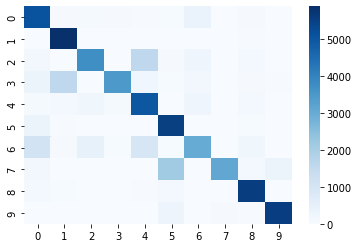

In [ ]:
sns.heatmap(conf_mat, cmap="Blues")

## Hyperparam Tuning

In [ ]:
from itertools import product
from collections import OrderedDict, namedtuple

for a,b in product([1,2],["a","b"]):
  print(a,b)

1 a
1 b
2 a
2 b


In [ ]:
class RunBuilder():
  @staticmethod
  def get_runs(params):
    Run = namedtuple('Run',params.keys()) # Run is a class here
    runs = []

    for v in product(*params.values()):
      runs.append(Run(*v)) # Runs(batch_size, lr) constructor : Order is important so use Ordered dict
    
    return runs

In [ ]:
params = OrderedDict({"batch_size":[10,100,1000], "lr":[0.1,0.01,0.001]})

runs = RunBuilder.get_runs(params)
runs

[Run(batch_size=10, lr=0.1),
 Run(batch_size=10, lr=0.01),
 Run(batch_size=10, lr=0.001),
 Run(batch_size=100, lr=0.1),
 Run(batch_size=100, lr=0.01),
 Run(batch_size=100, lr=0.001),
 Run(batch_size=1000, lr=0.1),
 Run(batch_size=1000, lr=0.01),
 Run(batch_size=1000, lr=0.001)]

In [ ]:
*param_list

SyntaxError: ignored